Sanity test, analysis script 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
%config InlineBackend.figure_format='retina'


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
# subject_id = 2
with pd.HDFStore(f'../onchip_experimentaldata/board_orange/2022-10-19/DC_FF_curve/15-56/data/DC_Frequency.h5') as store:
    key = store.keys()[0]
    df = store.get(key)
display(df.head())
# print(df[(df.InputRate>0.) & (df.InputRate<30)])
figA = plt.figure(figsize=(6,6),dpi=100)
sns.lineplot(data= df,x="Input",y="FiringRate",style="Repeat",hue="Type").set(xlabel='DC Coarse 2', ylabel = 'Firing rate in Hz')#,xlim=(0,250),ylim=(0,250))
# plt.axis('equal')
plt.show()#savefig(f"../data/board_orange/2022-10-07/DC_FF_curve/12-13/Input_Frequency.svg",facecolor = 'white')
plt.close(figA)

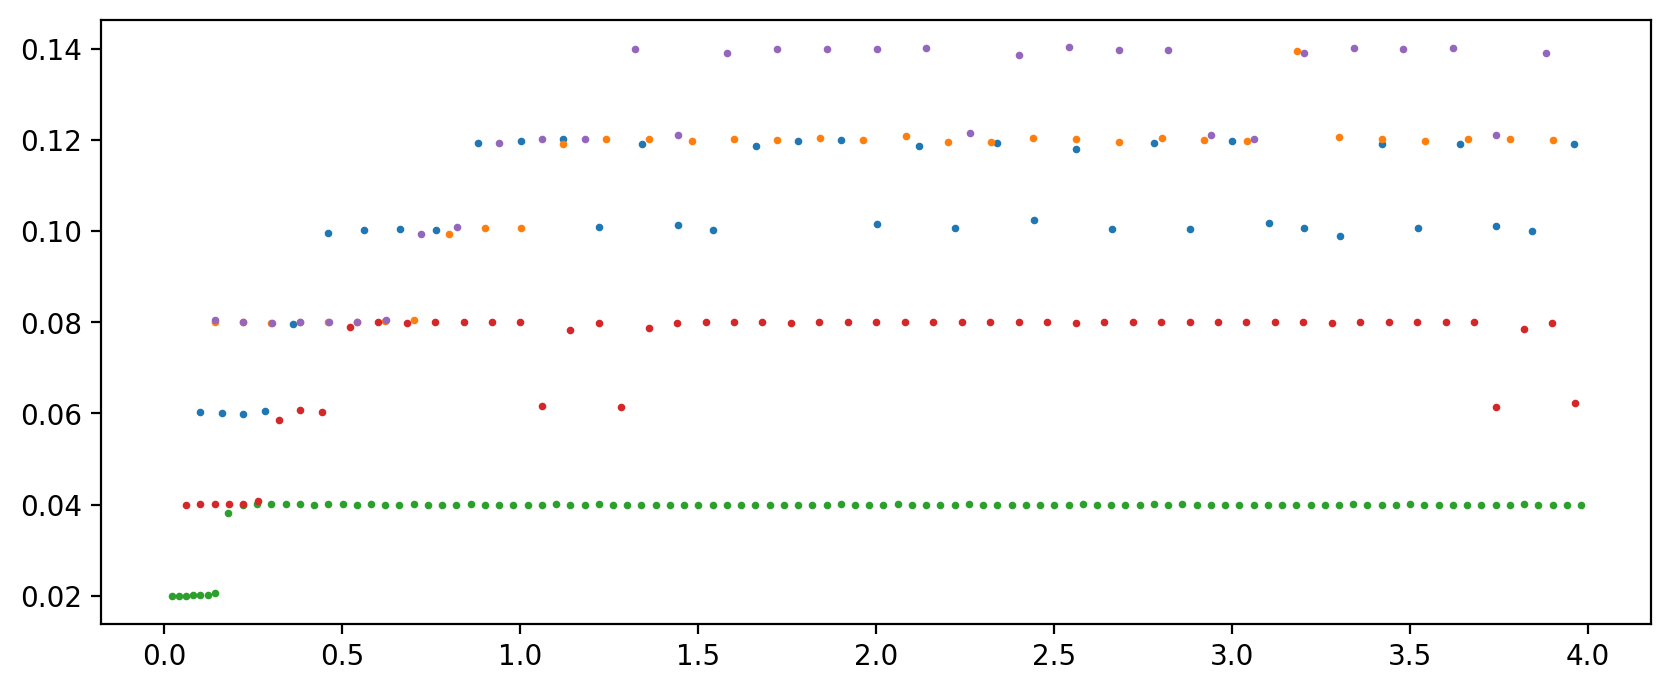

In [56]:
%config InlineBackend.figure_format='retina'
# subject_id = 2
mypath = f'/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_orange/2023-02-13/TEST_adapt'
for dir_p in ['14-02']:
    netfnames = glob.glob(f"{mypath}/{dir_p}/data/Network_TEST_*.h5",recursive=True)
    with pd.HDFStore(netfnames[0]) as store:
        key = store.keys()[0]
        dfnetwork = store.get(key)
    fnames = glob.glob(f"{mypath}/{dir_p}/data/NetworkActivity_TEST_adapt.h5",recursive=True)

    df_ISI = pd.DataFrame()
    df_Spikes = pd.DataFrame()
    df_FR = pd.DataFrame()
    with pd.HDFStore(fnames[0]) as store:
        for key in store.keys():        
            df_Spikes = store.get(key)
            
    df_Spikes_0_SST= df_Spikes[(df_Spikes.Type=='SST')&(df_Spikes.Repeat==3)][['Id','Timestamp']]
    figisi= plt.figure(figsize=(10,4),dpi=100)
    for nid in df_Spikes_0_SST.Id.unique():
        tm = df_Spikes_0_SST[df_Spikes_0_SST.Id==nid].Timestamp
        
        plt.scatter(tm,tm.diff(),s=3)


In [11]:
%config InlineBackend.figure_format='retina'
# subject_id = 2
mypath = f'/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_orange/2023-02-13/TEST_adapt/11-53/data'
netfnames = glob.glob(f"{mypath}/Network_TEST_*.h5",recursive=True)
with pd.HDFStore(netfnames[0]) as store:
    key = store.keys()[0]
    dfnetwork = store.get(key)


fnames = glob.glob(f"{mypath}/NetworkActivity_TEST_adapt.h5",recursive=True)
print(fnames)  
df_ISI = pd.DataFrame()
df_Spikes = pd.DataFrame()
df_FR = pd.DataFrame()
with pd.HDFStore(fnames[0]) as store:
    for key in store.keys():
        
        df = store.get(key)
        print(df.head())
        dfisi = pd.DataFrame()
        dfspikes = pd.DataFrame()
        df_fr = pd.DataFrame()
        active_neurons = df.Id.unique()
        print(active_neurons)
        for neuronId in active_neurons:            
            Type = dfnetwork[dfnetwork.Id == neuronId].Type.values[0]
            spikes = df[df.Id == neuronId].sort_values('Timestamp').Timestamp.values            
            dict_fr = dict(NeuronId = neuronId,  fr = len(spikes), Iteration = iteration,Type=Type, Trial = trial)
            df_fr = pd.concat([df_fr,pd.DataFrame(dict_fr,index=[0])],ignore_index=True)
            df_FR = pd.concat([df_FR,df_fr],ignore_index=True)

            # mean_isi =np.mean(np.diff(spikes))
            # isi =np.diff(spikes)
            # dict_isi = dict(NeuronId = len(isi)*[neuronId],  ISI = isi, Iteration = len(isi)*[iteration],Type=len(isi)*[Type], Trial = len(isi)*[trial])
            dict_spikes = dict(NeuronId = len(spikes)*[neuronId],  spikes = spikes, Iteration = len(spikes)*[iteration],Type=len(spikes)*[Type], Trial = len(spikes)*[trial])
            # print(dict_spikes)
            # dfisi = pd.concat([dfisi,pd.DataFrame(dict_isi)],ignore_index=True)
            dfspikes = pd.concat([dfspikes,pd.DataFrame(dict_spikes)],ignore_index=True)
        # df_ISI = pd.concat([df_ISI,dfisi],ignore_index=True)
        df_Spikes = pd.concat([df_Spikes,dfspikes],ignore_index=True)
# df_ISI = df_ISI.astype({"Iteration": int})
# df_ISI
# df_Spikes = df_Spikes.astype({"Iteration": int, "Trial": int})
df_Spikes #= df_FR.astype({"FineVal": int})

# df_Spikes

# sns.set_theme("talk", font_scale=1.1, rc={"lines.linewidth": 2.5}, palette="bright",style='ticks',color_codes = True )
# figA = plt.figure(figsize=(20,10))

# sns.lineplot(data= df_FR,x="FineVal",y="fr",hue="Type",style="NeuronId")

# plt.show()#savefig(f"../data/board_orange/2022-08-07/RefP/14-37/reP.svg")
# plt.close(figA)

['/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_orange/2023-02-13/TEST_adapt/11-53/data/NetworkActivity_TEST_adapt.h5']
    Id  Timestamp Type  Input  Repeat
0  4.0   0.002007  Pyr     50       0
1  4.0   0.016861  Pyr     50       0
2  4.0   0.029131  Pyr     50       0
3  4.0   0.040219  Pyr     50       0
4  4.0   0.056242  Pyr     50       0
[ 4.  5.  6.  7.  8. 10. 11. 12. 13. 14. 16. 17. 18. 19. 20.]


,NeuronId,spikes,Iteration,Type,Trial
0,4.0,0.002007,0,Pyr,0
1,4.0,0.002025,0,Pyr,0
2,4.0,0.016861,0,Pyr,0
3,4.0,0.016879,0,Pyr,0
4,4.0,0.029131,0,Pyr,0
...,...,...,...,...,...
3423,20.0,1.510594,0,SST,0
3424,20.0,1.511206,0,SST,0
3425,20.0,1.526469,0,SST,0
3426,20.0,1.527313,0,SST,0


In [7]:
df_Spikes

,NeuronId,spikes,Iteration,Type,Trial
0,4.0,0.002007,0,Pyr,0
1,4.0,0.002025,0,Pyr,0
2,4.0,0.016861,0,Pyr,0
3,4.0,0.016879,0,Pyr,0
4,4.0,0.029131,0,Pyr,0
...,...,...,...,...,...
3423,20.0,1.510594,0,SST,0
3424,20.0,1.511206,0,SST,0
3425,20.0,1.526469,0,SST,0
3426,20.0,1.527313,0,SST,0


In [ ]:


def GetFiringFrequency(ti,N,sim_start,sim_end,t_window=20.):
    '''
    ti : spike train
    N : Neuron population
    simTime : to calculate bins   
    '''
    bins=np.arange(sim_start,sim_end,t_window)
    hists,_ =np.histogram(ti,bins=bins)
    fireRate= np.zeros(len(bins))
    idx_count=1

    for n in hists:
        # print(n)
        fireRate[idx_count] = n / (t_window * N)
        idx_count+=1
    return fireRate,bins
active_neurons = df_Spikes[df_Spikes.Type=='Pyr'].NeuronId.unique()
figFr = plt.figure(figsize=(20,10))
for nId in active_neurons:
    ti = df_Spikes[(df_Spikes.Type =='Pyr')&(df_Spikes.NeuronId ==nId)].spikes.values
    fireRateB,binsB = GetFiringFrequency(ti,1,min(ti),max(ti),t_window=.1)
    plt.plot(binsB,fireRateB)
plt.show()
plt.close()

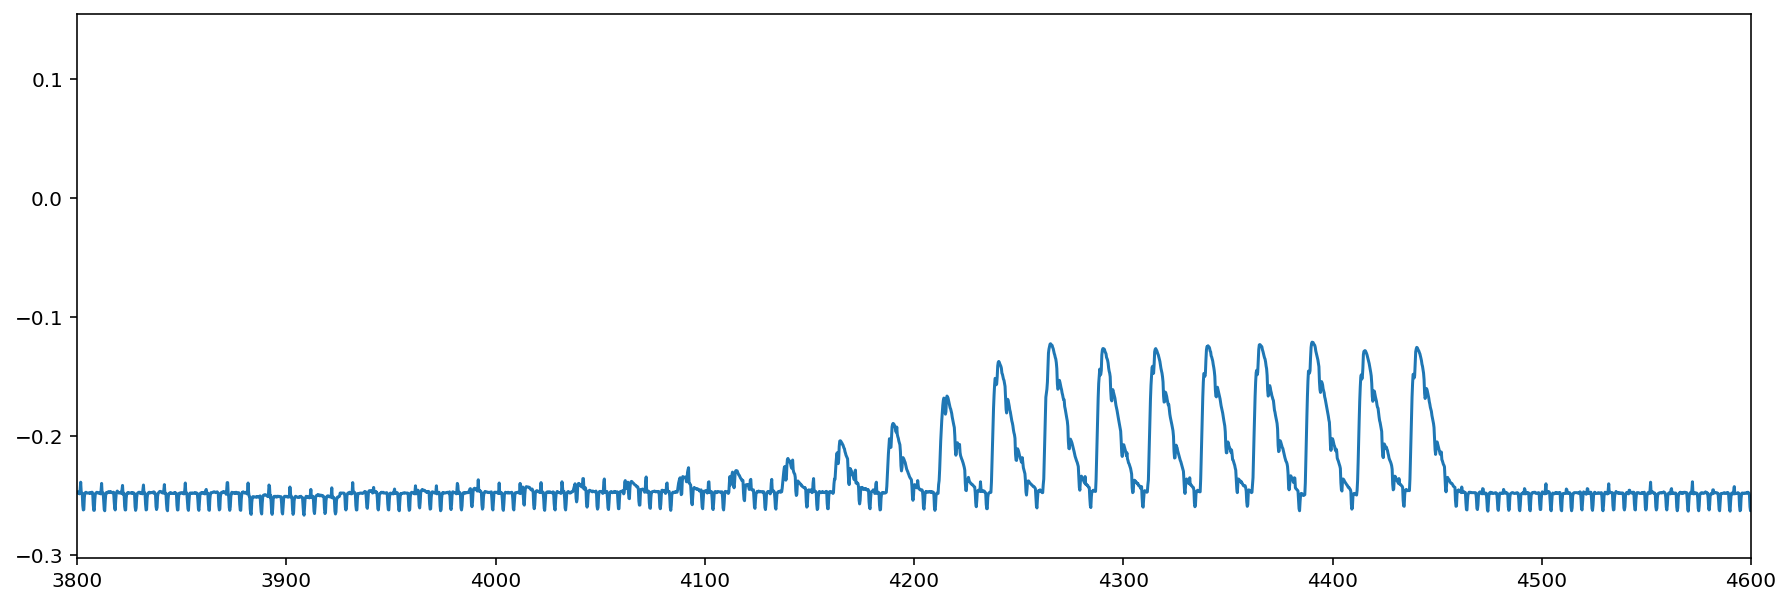

In [48]:
# s = 2000
FS = 4
rec_time = np.arange(0,35000, 1/FS)
# slice_arr = np.arange(4000,85000,3500)
figB = plt.figure(figsize = (15,5))
# plt.plot(dfcsv)
plt.plot(rec_time,dfcsv[0].values)
plt.xlim(3800,4600)
plt.show()



In [ ]:
import numpy as np 
FS = 8
rec_time = np.arange(0,15000, 1/FS)
print(len(rec_time))
figB = plt.figure(figsize = (20,5))
s = 23000
e = s + 1300
plt.plot(rec_time[s:e],dfcsv[0].values[s:e])
plt.ylim((0,0.5))
plt.show()
plt.close(figB)

figD = plt.figure(figsize = (20,5))
plt.plot(rec_time[s:e],dfcsv[1].values[s:e])
plt.ylim((0,0.5))

plt.show()
plt.close(figD)

In [ ]:
%config InlineBackend.figure_format='retina'
# subject_id = 2
import time

dir_path = "/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_orange/2022-10-14"
data_path = f"{dir_path}/DC_FF_curve/17-41/data"
img_path = f"{dir_path}/DC_FF_curve/17-41/img"
fnames = glob.glob(f"/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_orange/2022-10-19/EI_persistancy_SHUNT/11-17/data/weight_trend.h5",recursive=True)

with pd.HDFStore(fnames[0]) as store:
    print(store.keys())
    for key in store.keys():
        df_firingRate = store.get(key)
display(df_firingRate)

# sns.set_theme("talk", font_scale=1.1, rc={"lines.linewidth": 2.5}, palette="Spectral_r",style='ticks',color_codes = True )
# figA = plt.figure(figsize=(10,10))

# g = sns.FacetGrid(df_firingRate, col="Repeat_count",height=5,aspect=1.5,col_wrap=2, margin_titles=True,sharex=False)
# g.map_dataframe(sns.scatterplot, x="Iteration", y="AvgE",s=20,color= 'r')
# g.map_dataframe(sns.scatterplot, x="Iteration", y="AvgI",s=20,color='b')
# g.add_legend()
# # plt.ylim(0,80)
# plt.show()#savefig(f"{img_path}/convergence_trend.png")
# plt.close(figA)

# fnames = glob.glob(f"{data_path}/weight_trend.h5",recursive=True)

# with pd.HDFStore(fnames[0]) as store:
#     for key in store.keys():
#         df_weight = store.get(key)
# # display(df_weight[(df_weight.source=='Pyr')&(df_weight.target == 'PV')])
# sns.set_theme("talk", font_scale=1.1, rc={"lines.linewidth": 2.5}, palette="Set2",style='ticks',color_codes = True )
# figA = plt.figure(figsize=(10,10))

# g = sns.FacetGrid(df_weight, col="source",hue='coarse',height=6,aspect=1,row='target', margin_titles=True,sharex=False)
# g.map_dataframe(sns.scatterplot, x="Iteration", y="fine",s=20,edgecolor=None)

# g.add_legend()
# plt.show()#savefig(f"{img_path}/weight_trend.png")
# plt.close(figA)


In [66]:
fnames = glob.glob(f"/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_orange/2023-01-11/EI_homeostasis/14-24/data/board_Config.h5",recursive=True)
with pd.HDFStore(fnames[0]) as store:
    for key in store.keys():
        df_config = store.get(key)
df_config.query(f"Core == 1 and paramName in ['SYAM_W1_P','SYAM_W0_P','SYAM_W2_P','SYAM_W3_P']")

,paramName,Chip,Core,Coarse,Fine
53,SYAM_W3_P,0,1,0,0
54,SYAM_W1_P,0,1,4,60
73,SYAM_W0_P,0,1,5,65
88,SYAM_W2_P,0,1,3,180


In [ ]:
I_lookup = pd.DataFrame()
for coarse,I_coarse in zip([3,4,5],[50,400,3200]):
    for w in range(1,255):
        I_syn_weight = I_coarse * w/256
        I_lookup = pd.concat([I_lookup,pd.DataFrame(dict(I_coarse = I_coarse,coarse = coarse, w = w,I_syn_weight=I_syn_weight),index= [0])])

In [ ]:
figA = plt.figure(figsize=(15,10))

g = sns.scatterplot(data=I_lookup,x='w',y='I_syn_weight',hue='I_coarse', s= 5,edgecolor= None)
max_I_4 = I_lookup[I_lookup.coarse == 4].I_syn_weight.values.max()

# g.axhline(I_lookup[I_lookup.coarse == 3].I_syn_weight.values.max())

plt.show()#savefig(f"{img_path}/convergence_trend.svg")
plt.close(figA)

In [2]:
adapt= pd.read_csv('/media/mb/Data/Waveform_snapshots/adapt.csv',header=None)

In [ ]:
FS = 8
rec_time = np.arange(0,90000, 1/FS)
np.diff(rec_time)

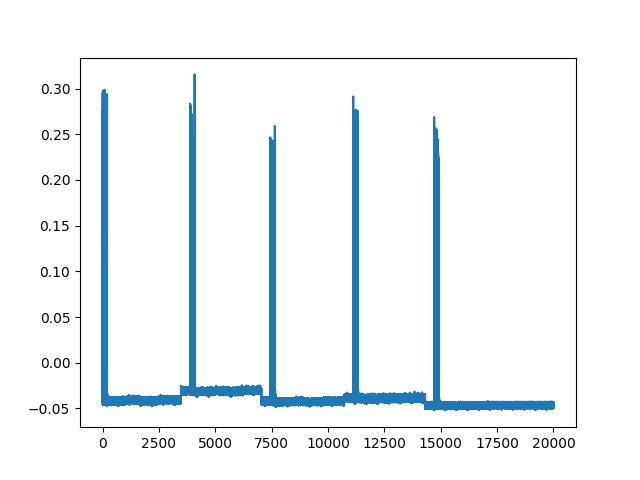

In [5]:
%matplotlib widget
FS = 8
rec_time = np.arange(0,20000, 1/FS)
plt.ioff()
plt.plot(rec_time[:len(adapt[0])],adapt[0])
# plt.xlim((4300,14500))
# plt.ylim((.6,1.3))
# plt.ylim((1.0,1.7))
plt.show()
plt.close()
plt.ion()

In [ ]:
%matplotlib widget

data_OFF= pd.read_csv('/media/mb/Data/Waveform_snapshots/traces_pytorch.csv',header=None)
plt.ioff()
plt.plot(data_OFF[0])

plt.show()
plt.ion()


In [ ]:
%matplotlib widget

plt.ioff()
plt.plot(data_ON[0][843000:855000],c='k',label='ON')
plt.plot(data_OFF[0][843000:855000],c='g',label='OFF')
plt.legend()
plt.show()
plt.close()
plt.ion()


In [ ]:
def get_connection_matrix_fan_in(source_count, target_count, in_degree, W):
    wval = [False] * 4
    wval[W] = True
    conn = [
        [(sindex, wval) for sindex in np.random.choice(source_count, in_degree, replace=False)]
        for tindex in range(target_count)
    ]
    return conn
def get_connection_matrix_recurrent(source_count, target_count,random_conn_dict,cluster_conn_dict):
    '''
    ONLY Fan-in connectivity
    '''
    clusters_selection = np.array(np.array_split(range(target_count), cluster_conn_dict['cluster_count']),dtype=int)            
    clusters = []
    if cluster_conn_dict['cluster_topology'] == 's':
        clusters +=[cluster[:cluster_conn_dict['cluster_size']] for cluster in clusters_selection]
    else:
        clusters +=[np.random.choice(cluster,cluster_conn_dict['cluster_size'],replace=False) for cluster in clusters_selection]
    
    conn = [[] for _ in range(target_count)]
    c_indegree = int(cluster_conn_dict['cluster_conn_p'] * cluster_conn_dict['cluster_size'])
    
    for cluster in clusters:
        for target_neuron in cluster:            
            cluster_source = np.random.choice(cluster,c_indegree,replace=False)
            random_source = np.random.choice(source_count, random_conn_dict['in_degree'], replace=False)
            common_neuron = np.intersect1d(cluster_source, random_source)
            wval = [False] * 4
            wval[cluster_conn_dict['W']] = True 
            wval[random_conn_dict['W']] = True 

            common_conn = list(zip(common_neuron,len(common_neuron) * [wval]))
            only_cluster = np.setdiff1d(cluster_source, common_neuron)
            wval = [False] * 4
            wval[cluster_conn_dict['W']] = True 
            only_cluster_conn = list(zip(only_cluster,len(only_cluster) * [wval]))
            
            only_non_cluster = np.setdiff1d(random_source, common_neuron)
            wval = [False] * 4
            wval[random_conn_dict['W']] = True
            only_non_cluster_conn = list(zip(only_non_cluster,len(only_non_cluster) * [wval]))
            conn[target_neuron] = common_conn + only_cluster_conn + only_non_cluster_conn
    return conn,clusters


random_conn_dict = dict(in_degree = round(0.1 * 50),W = 1)
cluster_conn_dict = dict(cluster_conn_p = .9,W = 3,cluster_count=1,cluster_size=10,cluster_topology='s')
conn_matrix,cluster_neurons= get_connection_matrix_recurrent(200,\
                                                                200,
                                                                random_conn_dict = random_conn_dict,\
                                                                cluster_conn_dict = cluster_conn_dict)


In [1]:
import numpy as np
def stochastic_rounding(x):
    '''
    Instead of round, use stochastic rounding
    '''
    integer_part = np.floor(x)
    decimal_part = x - integer_part > np.random.random(size=x.shape)
    return (integer_part + decimal_part).astype(int)

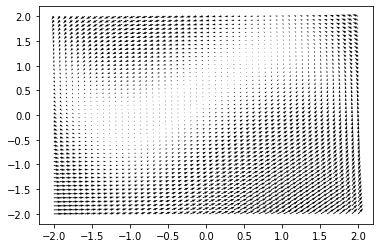

In [6]:
import numpy as np
import matplotlib.pyplot as plt


tau   = 2
I_ext = 0.5
a     = 0.8
b     = 0.7

def model(x, t = 0):
    'FitzHugh–Nagumo model'
    V, W = x
    dV = V - V**3/3 - W + I_ext
    dW = (V + a - b * W) / tau
    return np.array([dV, dW])

def phase_plane_plot(model, range_x = (-1,1), range_y = None,
                     num_grid_points = 50, show = False):
    '''
    Simple implementation of the phase plane plot in matplotlib.
    
    Input:
    -----
      *model* : function
        function that takes numpy.array as input with two elements
        representing two state variables
      *range_x* = (-1, 1) : tuple
        range of x axis
      *range_y* = None : tuple
        range of y axis; if None, the same range as *range_x*
      *num_grid_points* = 50 : int
        number of samples on grid
      *show* = False : bool
        if True it shows matplotlib plot
    '''
    if range_y is None:
        range_y = range_x
    x_ = np.linspace(range_x[0], range_x[1], num_grid_points)                                                             
    y_ = np.linspace(range_y[0], range_y[1], num_grid_points)                                                             

    grid = np.meshgrid(x_, y_)

    dfmat = np.zeros((num_grid_points, num_grid_points, 2))
    for nx in range(num_grid_points):
        for ny in range(num_grid_points):
            df = model([grid[0][nx,ny], grid[1][nx,ny]])
            dfmat[nx, ny, 0] = df[0]
            dfmat[nx, ny, 1] = df[1]


    plt.quiver(grid[0], grid[1], dfmat[:, :, 0], dfmat[:, :, 1])
    # plt.contour(grid[0], grid[1], dfmat[:, :, 0], [0], colors = 'r')
    # plt.contour(grid[0], grid[1], dfmat[:, :, 1], [0], colors = 'g')
    if show:
        plt.show()
    return dfmat

if __name__ == "__main__":
    dfmat = phase_plane_plot(model, range_x = (-2, 2), show = True)
    